# Model Training

In [145]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('data/cleaned_data.csv')
df.head()

,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),CustomerAge
0,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,25.0,22
1,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-02-08,27999.0,-41
2,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,459.0,20
3,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,2060.0,43
4,C9031234,1988-03-24,F,MUMBAI,6714.43,2016-02-08,1762.5,28


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041613 entries, 0 to 1041612
Data columns (total 8 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CustomerID               1041613 non-null  object 
 1   CustomerDOB              1041613 non-null  object 
 2   CustGender               1041613 non-null  object 
 3   CustLocation             1041613 non-null  object 
 4   CustAccountBalance       1041613 non-null  float64
 5   TransactionDate          1041613 non-null  object 
 6   TransactionAmount (INR)  1041613 non-null  float64
 7   CustomerAge              1041613 non-null  int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 63.6+ MB


## Outlier Detection

In [147]:
from sklearn.ensemble import IsolationForest
num_cols = df.select_dtypes(include=[np.float64, np.int64])
isof = IsolationForest(n_estimators=100, contamination=0.1)
isof.fit(num_cols)
outliers = isof.predict(num_cols)
df['is_inliner'] = outliers
df = df[df['is_inliner'] == 1]
df.head()
df.drop('is_inliner', axis=1, inplace=True)


In [148]:
df

,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),CustomerAge
0,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,25.0,22
2,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,459.0,20
4,C9031234,1988-03-24,F,MUMBAI,6714.43,2016-02-08,1762.5,28
5,C1536588,2072-08-10,F,ITANAGAR,53609.20,2016-02-08,676.0,-56
6,C7126560,1992-01-26,F,MUMBAI,973.46,2016-02-08,566.0,24
...,...,...,...,...,...,...,...,...
1041608,C8020229,1990-08-04,M,DELHI,7635.19,2016-09-18,799.0,26
1041609,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,460.0,24
1041610,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,770.0,27
1041611,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,1000.0,38


## Label Encoding

In [149]:
df=df.sample(n=100000,random_state=42).reset_index(drop=True)
df.head()

,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),CustomerAge
0,C6439058,1990-11-04,M,BHOPAL,25193.76,2016-10-09,130.0,26
1,C6915045,1989-08-22,F,NOIDA,11.17,2016-11-09,606.9,27
2,C1640849,2057-01-08,M,DELHI,15882.60,2016-02-08,2500.0,-41
3,C2231318,1975-11-25,M,CHANDIGARH,210913.22,2016-08-17,700.0,41
4,C7918789,1990-07-05,M,FARIDABAD,4458.83,2016-03-08,50.0,26


In [150]:
df.drop(columns=['TransactionDate', 'CustomerDOB'], inplace=True)

In [151]:
# from sklearn.preprocessing import OneHotEncoder
# nominal_columns = df.select_dtypes(include=['object']).columns
# ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
# a = ohe.fit_transform(df[nominal_columns])
# a = pd.DataFrame(a, columns=ohe.get_feature_names_out(nominal_columns))
# df = df.drop(nominal_columns, axis=1)
# df = pd.concat([df, a], axis=1)

In [152]:
df

,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge
0,C6439058,M,BHOPAL,25193.76,130.00,26
1,C6915045,F,NOIDA,11.17,606.90,27
2,C1640849,M,DELHI,15882.60,2500.00,-41
3,C2231318,M,CHANDIGARH,210913.22,700.00,41
4,C7918789,M,FARIDABAD,4458.83,50.00,26
...,...,...,...,...,...,...
99995,C7518935,M,CHENNAI,18085.19,1699.00,-55
99996,C4837659,F,DELHI,6454.31,101.00,21
99997,C4741726,F,DELHI,750435.87,258.00,41
99998,C5440323,M,GURGAON,14582.95,32.00,22


## ordinal encoding

In [153]:
c = df.select_dtypes(include=['object']).columns
df[c]

,CustomerID,CustGender,CustLocation
0,C6439058,M,BHOPAL
1,C6915045,F,NOIDA
2,C1640849,M,DELHI
3,C2231318,M,CHANDIGARH
4,C7918789,M,FARIDABAD
...,...,...,...
99995,C7518935,M,CHENNAI
99996,C4837659,F,DELHI
99997,C4741726,F,DELHI
99998,C5440323,M,GURGAON


In [154]:
from sklearn.preprocessing import OrdinalEncoder

# instantiate the ordinal encoder
encoder = OrdinalEncoder()
columns = df.select_dtypes(include=['object']).columns
# fit and transform the data
df[columns] = encoder.fit_transform(df[columns])
column_names = df.columns
df

,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge
0,66330.0,1.0,333.0,25193.76,130.00,26
1,71608.0,0.0,1727.0,11.17,606.90,27
2,8266.0,1.0,586.0,15882.60,2500.00,-41
3,15287.0,1.0,435.0,210913.22,700.00,41
4,83909.0,1.0,764.0,4458.83,50.00,26
...,...,...,...,...,...,...
99995,79047.0,1.0,461.0,18085.19,1699.00,-55
99996,46932.0,0.0,586.0,6454.31,101.00,21
99997,45870.0,0.0,586.0,750435.87,258.00,41
99998,54242.0,1.0,892.0,14582.95,32.00,22


In [155]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = scaler.fit_transform(df)
# pca = PCA(n_components=0.80)
# df = pca.fit_transform(df)
df = pd.DataFrame(df)
df.columns = column_names
df

,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge
0,0.604608,0.614770,-1.108638,-0.234905,-0.569455,-0.038541
1,0.790526,-1.626625,0.879045,-0.503803,-0.188792,-0.004754
2,-1.440700,0.614770,-0.747889,-0.334329,1.322286,-2.302266
3,-1.193385,0.614770,-0.963198,1.748196,-0.114480,0.468263
4,1.223829,0.614770,-0.494082,-0.456311,-0.633312,-0.038541
...,...,...,...,...,...,...
99995,1.052565,0.614770,-0.926125,-0.310809,0.682925,-2.775283
99996,-0.078688,-1.626625,-0.747889,-0.435003,-0.592603,-0.207475
99997,-0.116097,-1.626625,-0.747889,7.509185,-0.467285,0.468263
99998,0.178807,0.614770,-0.311569,-0.348206,-0.647679,-0.173689


In [156]:
# from sklearn.cluster import KMeans, MiniBatchKMeans
# from sklearn.metrics import silhouette_score
#
# inertia = []
# sil_score = []
#
# for k in range(3, 15):
#     kmeans = MiniBatchKMeans(n_clusters=k, init="k-means++")
#     kmeans.fit(df)
#     inertia.append(kmeans.inertia_)
#     sil = silhouette_score(df, kmeans.labels_)
#     sil_score.append(sil)
#
# plt.grid()
# plt.plot(range(3, 15), inertia)
# plt.xlabel('Number of clusters')
# plt.ylabel('Inertia')
# plt.show()

In [157]:
# plt.plot(range(3, 15), sil_score)
# plt.xlabel('Number of clusters')
# plt.ylabel('score')
# plt.show()

In [158]:
# pca = PCA(2)
# df1 = pca.fit_transform(df)
# df1 = pd.DataFrame(df1)
# df1.columns = ['PC1', 'PC2']
# df1

## customer location

In [159]:
df1 = df[['CustLocation', 'TransactionAmount (INR)']]
df1

,CustLocation,TransactionAmount (INR)
0,-1.108638,-0.569455
1,0.879045,-0.188792
2,-0.747889,1.322286
3,-0.963198,-0.114480
4,-0.494082,-0.633312
...,...,...
99995,-0.926125,0.682925
99996,-0.747889,-0.592603
99997,-0.747889,-0.467285
99998,-0.311569,-0.647679


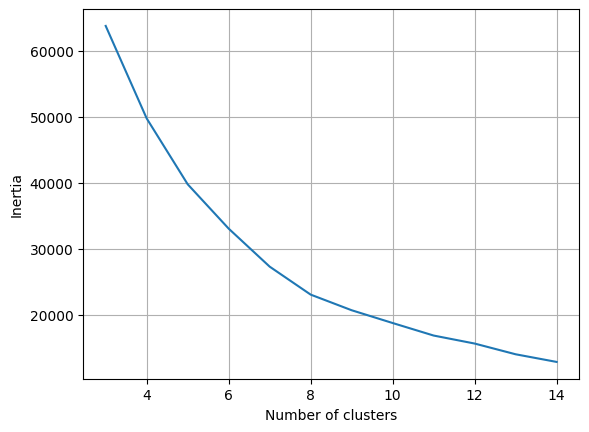

In [160]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score

inertia = []
sil_score = []

for k in range(3, 15):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df1)
    inertia.append(kmeans.inertia_)
    # sil = silhouette_score(df, kmeans.labels_)
    # sil_score.append(sil)

plt.grid()
plt.plot(range(3, 15), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
# plt.plot(range(3, 15), sil_score)
# plt.xlabel('Number of clusters')
# plt.ylabel('score')
# plt.show()

In [161]:
inertia

[63778.86681204634,
 49765.77467875027,
 39795.67416544356,
 33077.61089365003,
 27320.20770301013,
 23082.5078211941,
 20715.623346211196,
 18779.717370653925,
 16882.771805824617,
 15671.08679693453,
 14046.106712521576,
 12887.76603590952]

In [162]:
# pca.components_

In [163]:
kmeans = KMeans(n_clusters=7, init="k-means++")
labels = kmeans.fit_predict(df1)
df1['labels'] = labels
df1

,CustLocation,TransactionAmount (INR),labels
0,-1.108638,-0.569455,2
1,0.879045,-0.188792,3
2,-0.747889,1.322286,1
3,-0.963198,-0.114480,2
4,-0.494082,-0.633312,0
...,...,...,...
99995,-0.926125,0.682925,1
99996,-0.747889,-0.592603,2
99997,-0.747889,-0.467285,2
99998,-0.311569,-0.647679,0


In [164]:
df1.columns = ['PC1', 'PC2', 'labels']

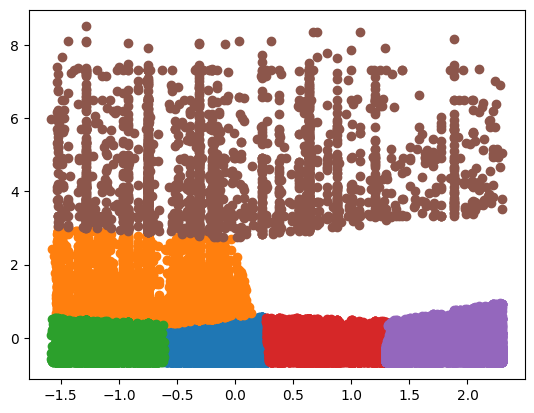

In [165]:
plt.scatter(df1[ df1['labels'] == 0]['PC1'], df1[ df1['labels'] == 0]['PC2'])
plt.scatter(df1[ df1['labels'] == 1]['PC1'], df1[ df1['labels'] == 1]['PC2'])
plt.scatter(df1[ df1['labels'] == 2]['PC1'], df1[ df1['labels'] == 2]['PC2'])
plt.scatter(df1[ df1['labels'] == 3]['PC1'], df1[ df1['labels'] == 3]['PC2'])
plt.scatter(df1[ df1['labels'] == 4]['PC1'], df1[ df1['labels'] == 4]['PC2'])
plt.scatter(df1[ df1['labels'] == 5]['PC1'], df1[ df1['labels'] == 5]['PC2'])
plt.show()